<a href="https://colab.research.google.com/github/Dena7Qatry/Breast-Cancer-Classification-ML/blob/main/breast_cancer_classification_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Breast Cancer Prediction  

Import Necessary Libraries:

In [ ]:
# Deal with data
import pandas as pd
import numpy as np
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
# Train_test_split
from sklearn.model_selection import train_test_split
# Pipelines
from sklearn.pipeline import make_pipeline
# Models
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
# Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
# Model selection
from sklearn.model_selection import GridSearchCV

In [ ]:
%cd /content/drive/MyDrive/BSBI/BSBI intro to AI

/content/drive/MyDrive/BSBI/BSBI intro to AI


##Data loading:

In [ ]:
import pandas as pd
df = pd.read_csv('breast_cancer_dataset.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Task 1: Data Exploration:


In [ ]:
# Examining the shape of the DataFrame
print("Shape of the DataFrame:", df.shape)

# Check data types
print("\nData Types:")
df.info()

Shape of the DataFrame: (569, 32)

Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-

In [ ]:
# Statistics for numerical features
print("Statistics for numerical features:")
df.describe()

Statistics for numerical features:


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Target Variable Distribution:


Text(0.5, 1.0, 'Distribution of Target Variable')

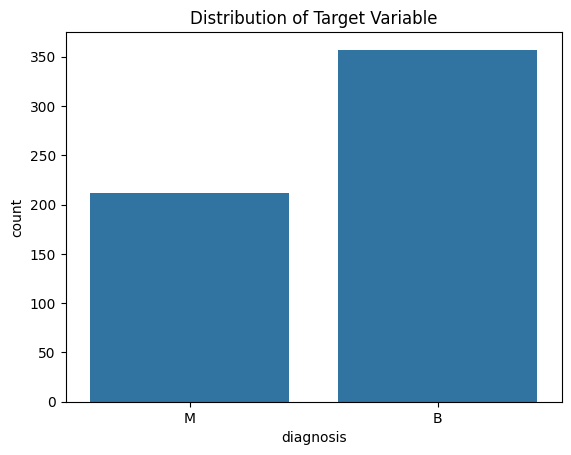

In [ ]:
# Analyzing the distribution of the target variable
print("Target Variable Distribution:")
sns.countplot(data=df,x="diagnosis")
plt.title("Distribution of Target Variable")

The data is Imbalanced.

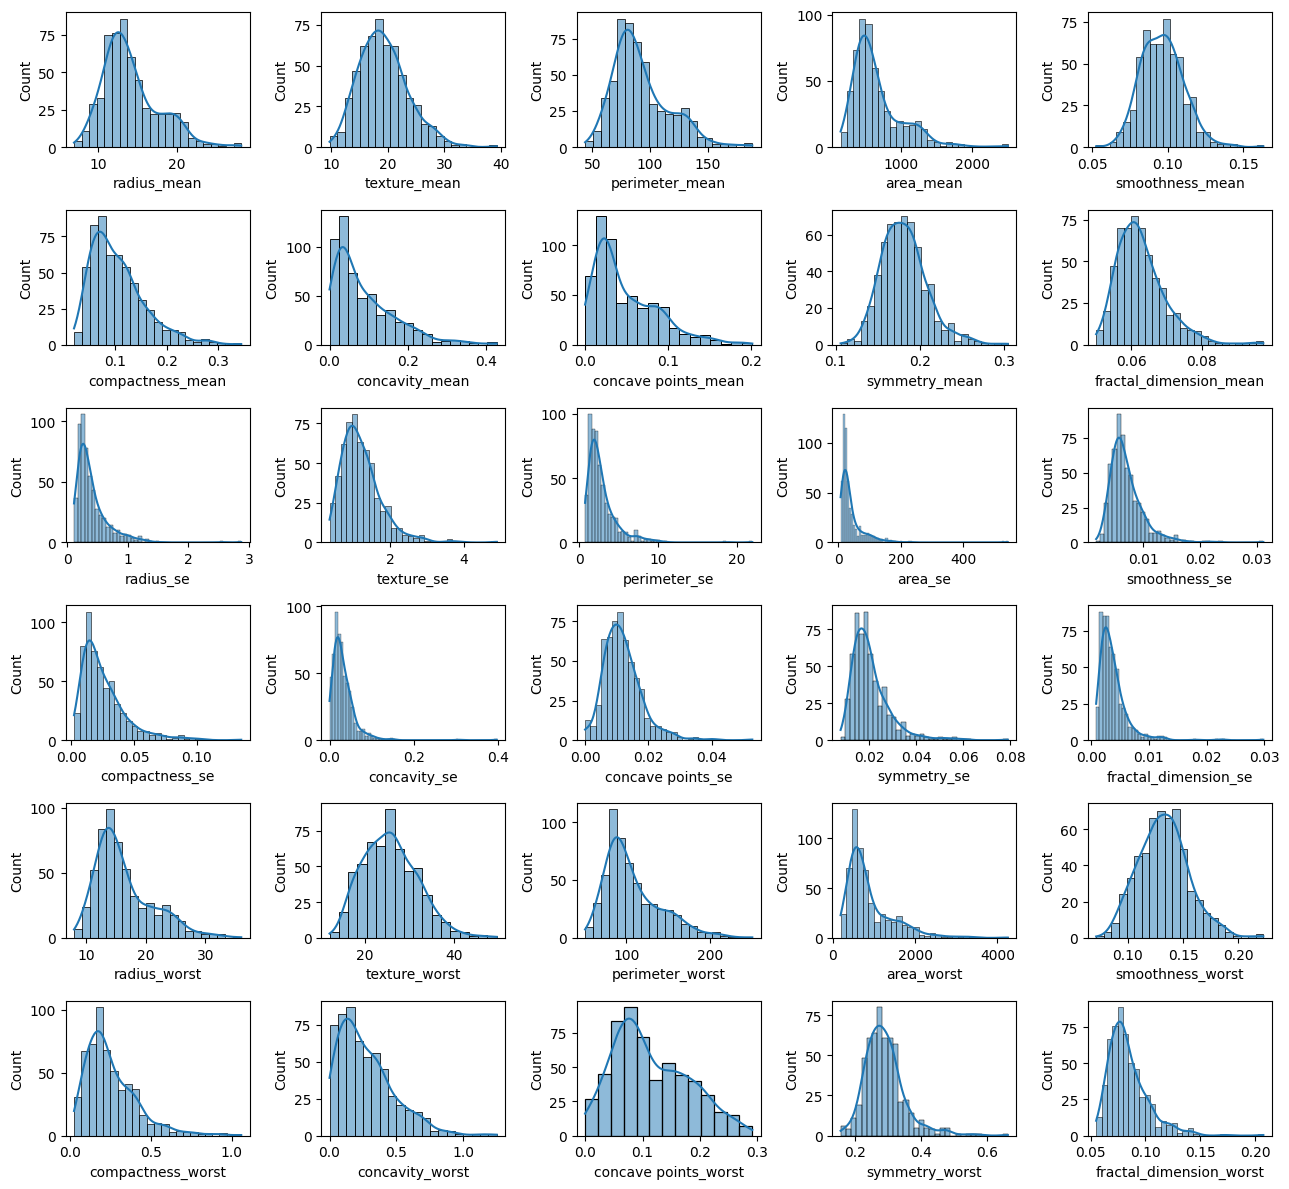

In [ ]:
# Histograms visualizations to spot outliers or skew.
numerical_features=['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']
# Excluded the "id" feature as it is not relvant in this context.

fig,ax=plt.subplots(6,5,figsize=(13,12))
for i,subplot in zip(numerical_features,ax.flatten()):
  sns.histplot(df[i],ax=subplot, kde=True)
plt.tight_layout()

Most of the features’ distribution are skewed to the Right.

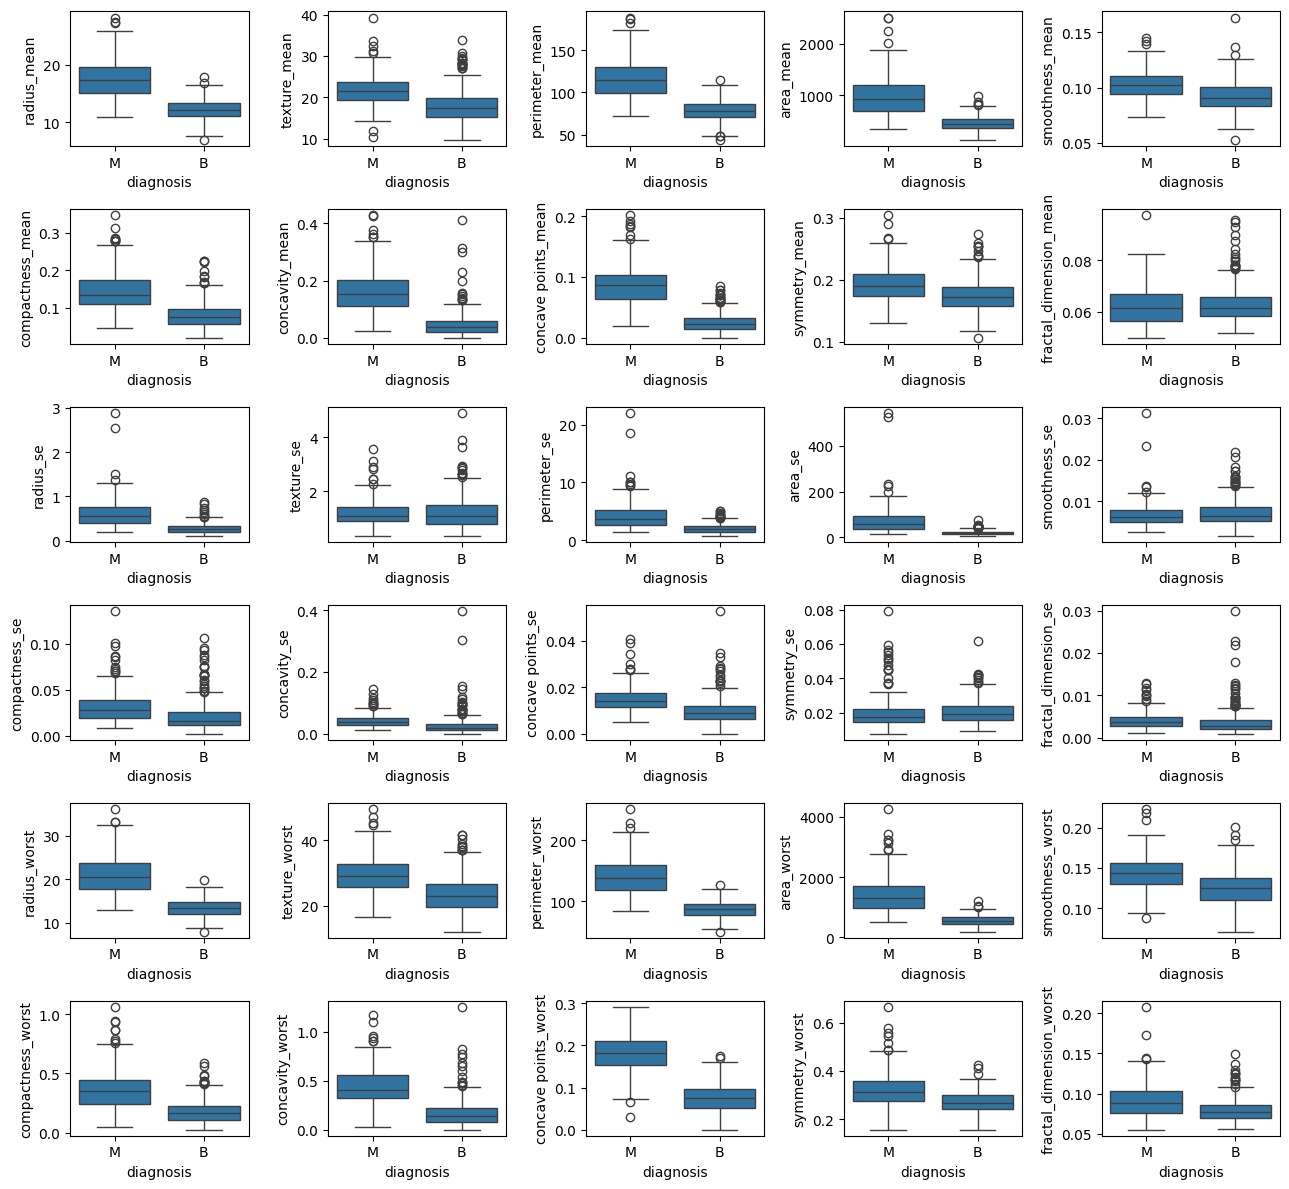

In [ ]:
# Box plots visualizations to spot outliers or skew.
fig,ax=plt.subplots(6,5,figsize=(13,12))
for i,subplot in zip(numerical_features,ax.flatten()):
  sns.boxplot(data=df, x='diagnosis',y=i,ax=subplot)
plt.tight_layout()


Outliers are seen in all the features.

**Preprocessing:**

Transforming categorical labels into numeric form using LabelEncoder():


In [ ]:
le=LabelEncoder()
df['diagnosis']=le.fit_transform(df['diagnosis'])

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Calculating correlation coefficients between features and the target:


Text(0.5, 1.0, 'Correlation Matrix Heatmap')

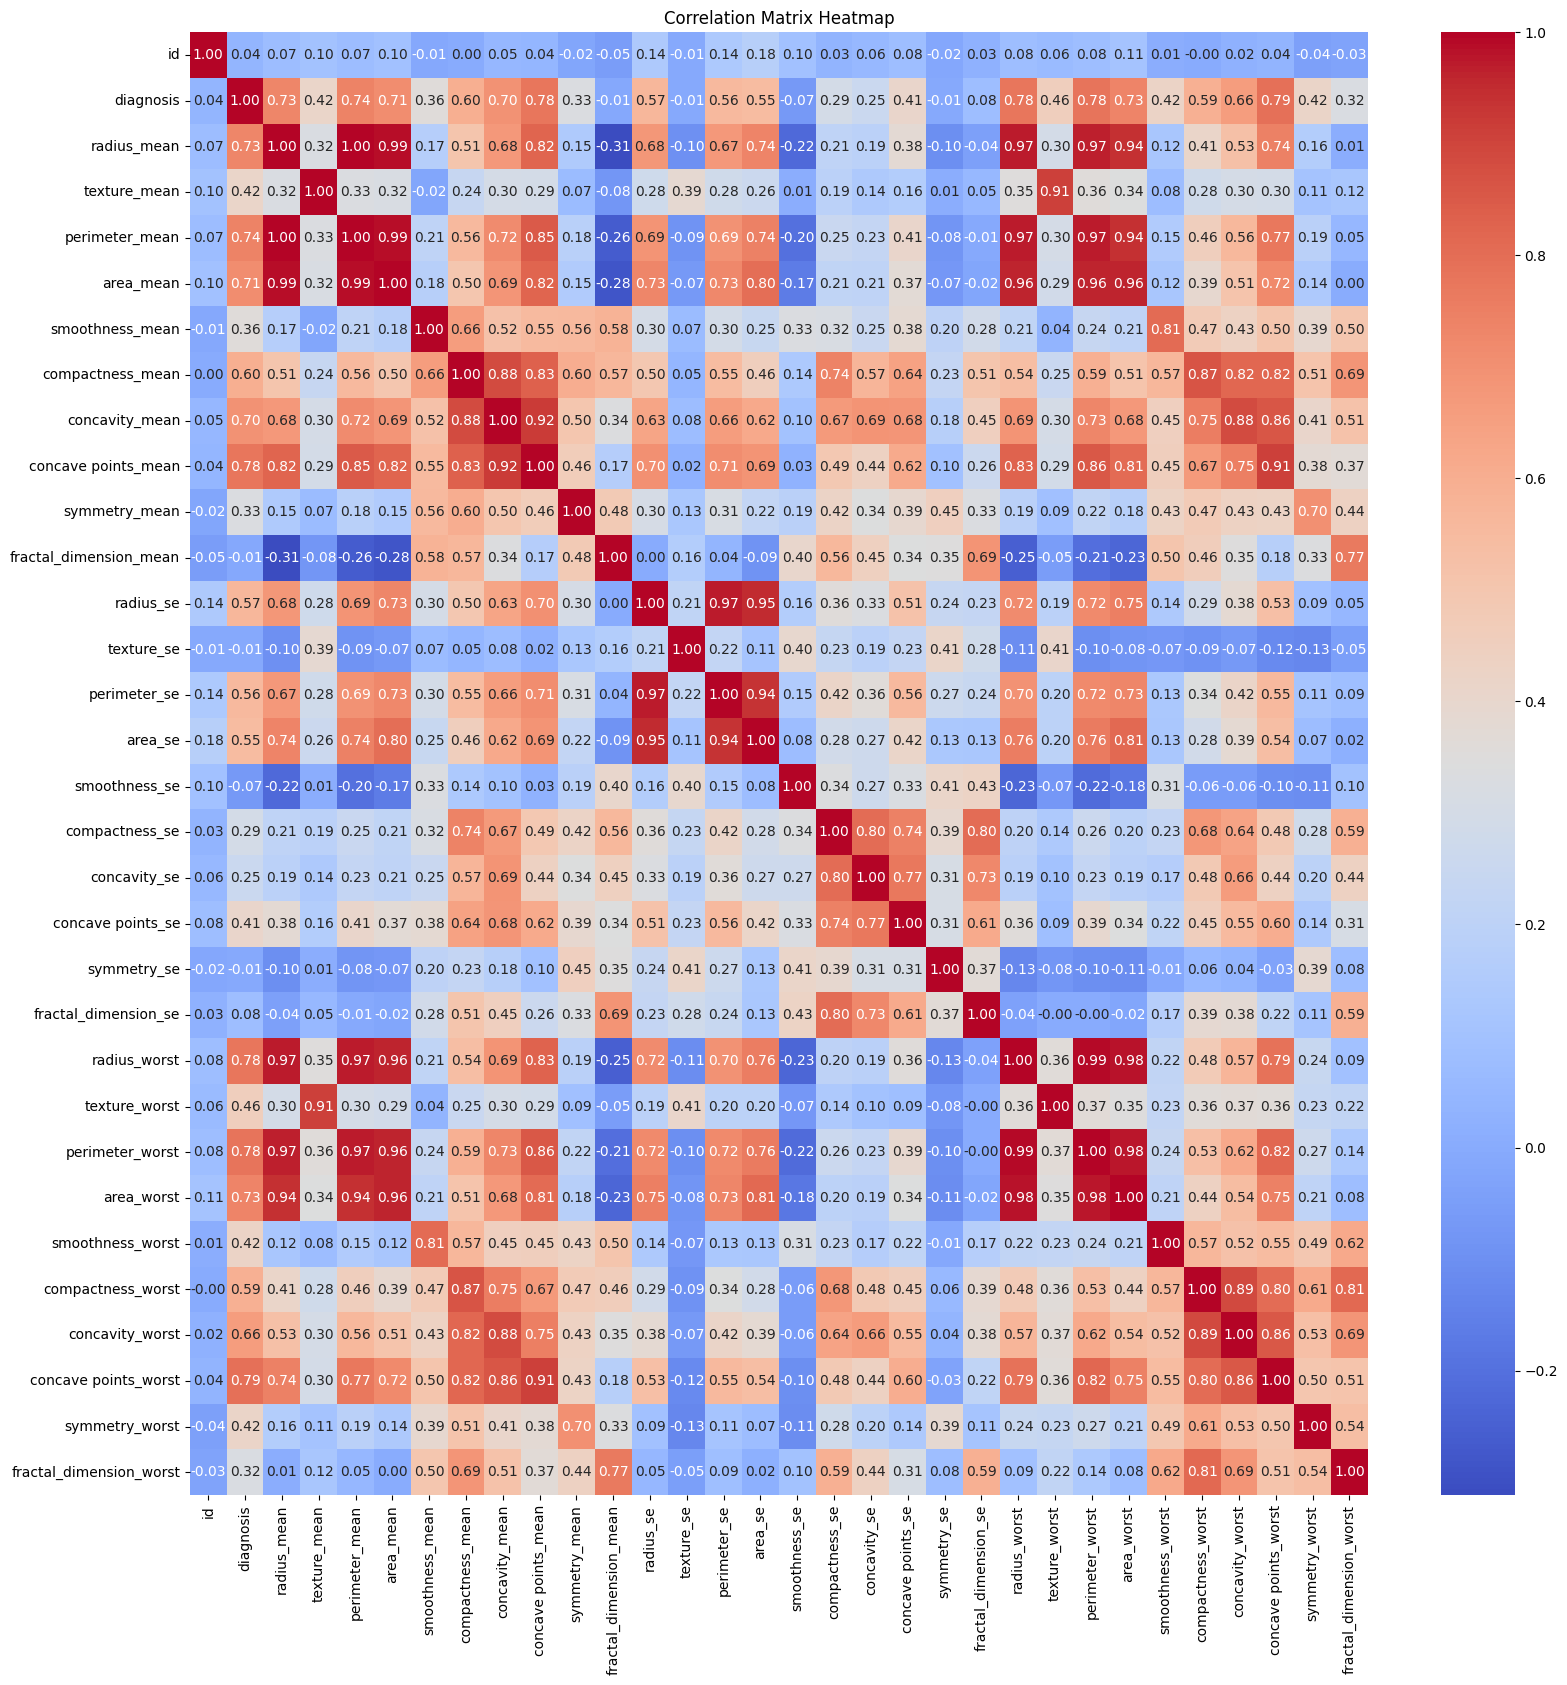

In [ ]:
corr=df.corr()
# Plotting the correlation matrix using Heatmap.
plt.figure(figsize=(19, 19))
sns.heatmap(corr, annot=True,cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')

It is hard to analyse the Heatmap here with such many features, so we will sort their values instead:


In [ ]:
corr['diagnosis'].sort_values()

,diagnosis
smoothness_se,-0.067016
fractal_dimension_mean,-0.012838
texture_se,-0.008303
symmetry_se,-0.006522
id,0.039769
fractal_dimension_se,0.077972
concavity_se,0.253730
compactness_se,0.292999
fractal_dimension_worst,0.323872
symmetry_mean,0.330499


**Feature Selection:**

* Selected the features with correlation coefficients >= 0.7 " strong values" with the diagnosis column.


In [ ]:
target_corr=corr['diagnosis'].abs()
selected_features=target_corr[target_corr>=0.7].index
df_updated=df[selected_features]
df_updated.head()

,diagnosis,radius_mean,perimeter_mean,area_mean,concave points_mean,radius_worst,perimeter_worst,area_worst,concave points_worst
0,1,17.99,122.80,1001.0,0.14710,25.38,184.60,2019.0,0.2654
1,1,20.57,132.90,1326.0,0.07017,24.99,158.80,1956.0,0.1860
2,1,19.69,130.00,1203.0,0.12790,23.57,152.50,1709.0,0.2430
3,1,11.42,77.58,386.1,0.10520,14.91,98.87,567.7,0.2575
4,1,20.29,135.10,1297.0,0.10430,22.54,152.20,1575.0,0.1625


Text(0.5, 1.0, 'Correlation Matrix Heatmap - selected features')

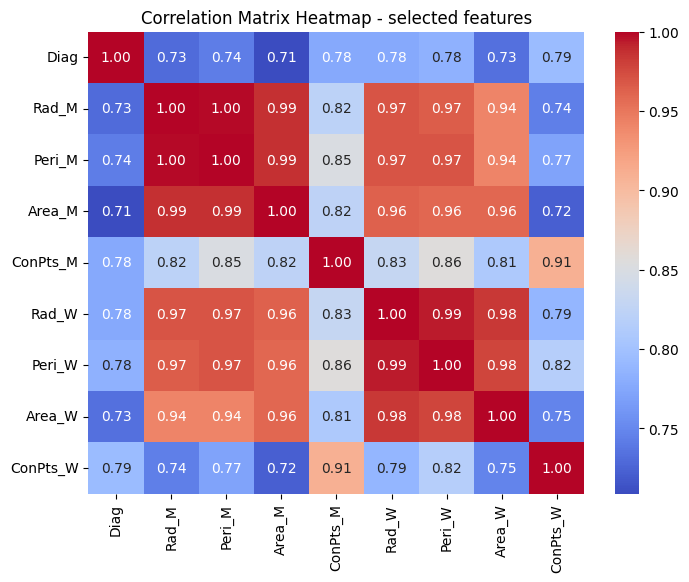

In [ ]:
# Plotting the correlation matrix of the selected features using Heatmap.
short_labels = ['Diag', 'Rad_M', 'Peri_M', 'Area_M', 'ConPts_M',
                'Rad_W', 'Peri_W', 'Area_W', 'ConPts_W']
corr2=df[selected_features].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr2, annot=True,cmap='coolwarm', fmt=".2f",xticklabels=short_labels, yticklabels=short_labels)
plt.title('Correlation Matrix Heatmap - selected features')

## Task 2: Data Preparation:  




1. Data cleaning:

In [ ]:
#check for null values:
df_updated.isnull().sum()

,0
diagnosis,0
radius_mean,0
perimeter_mean,0
area_mean,0
concave points_mean,0
radius_worst,0
perimeter_worst,0
area_worst,0
concave points_worst,0


There are no missing values in any column. Hence we do not need to  implement any imputation strategy.

In [ ]:
# Handling outliers in the selected features columns using Winsorizing
# The percentiles are 5 and 95
features=['radius_mean', 'perimeter_mean', 'area_mean',
       'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst',
       'concave points_worst']
for col in features:
    upper_limit = df_updated[col].quantile(0.95)  # Calculate 95th percentile
    lower_limit = df_updated[col].quantile(0.05)  # Calculate 5th percentile
    df_updated[col] = df_updated[col].clip(lower=lower_limit, upper=upper_limit) # Winsorize

<ipython-input-58-f06df6ffe8e0>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_updated[col] = df_updated[col].clip(lower=lower_limit, upper=upper_limit) # Winsorize
<ipython-input-58-f06df6ffe8e0>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_updated[col] = df_updated[col].clip(lower=lower_limit, upper=upper_limit) # Winsorize
<ipython-input-58-f06df6ffe8e0>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

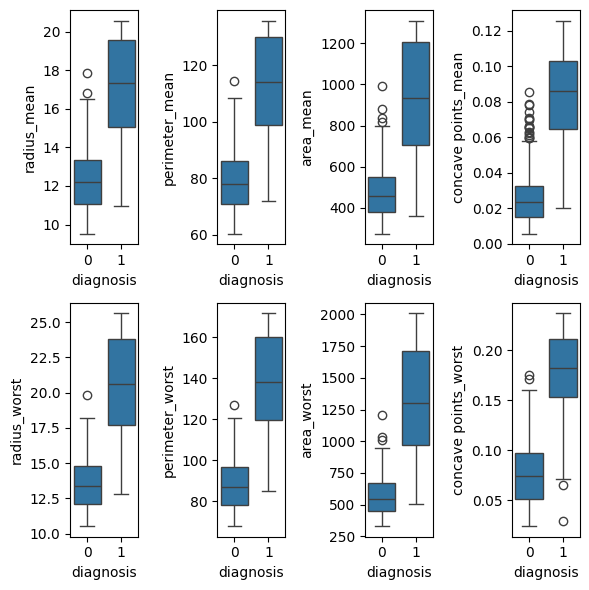

In [ ]:
#Re-visualizing the distribution:
fig,ax=plt.subplots(2,4,figsize=(6,6))
for i,subplot in zip(features,ax.flatten()):
  sns.boxplot(data=df_updated, x='diagnosis',y=i,ax=subplot)
plt.tight_layout()

There are still some outliers, especially in the 'concave points_worst' column.

In [ ]:
#Assign the diagnosis column as the target variable
y=df_updated['diagnosis']
X=df_updated.drop('diagnosis',axis=1)

2. Handling data imbalance using SMOTE:


In [ ]:
sm=SMOTE(random_state=42)
X_resampled, y_resampled=sm.fit_resample(X,y)

shape of data after resampling with SMOTE: 
(714, 8)


Target Variable Distribution after Resampling:


Text(0.5, 1.0, 'Distribution of Target Variable after Resampling')

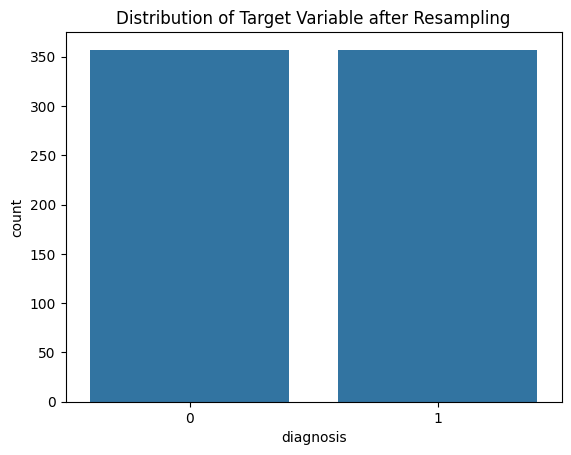

In [ ]:
#Re-visualizing the distribution of the target variable:
print(f"shape of data after resampling with SMOTE: \n{X_resampled.shape}")
print("\n")
print("Target Variable Distribution after Resampling:")
sns.countplot(data=pd.concat([X_resampled, y_resampled],axis=1),x="diagnosis")
plt.title("Distribution of Target Variable after Resampling")

## Task 3: Feature scaling & Model Training:


1. Spliting the data:

In [ ]:
#Spliting data into training and testing sets:
x_train,x_test,y_train,y_test=train_test_split(X_resampled,y_resampled,test_size=0.2, random_state=42)
print(f"shape of training x: \n{x_train.shape}")
print(f"shape of testing x: \n{x_test.shape}")

shape of training x: 
(571, 8)
shape of testing x: 
(143, 8)


**2. Define classification models in *pipelines* with feature scaling using StandardScaler()**

The 6 algorithms that will be trained are:
 1. Support Vector Machine
 2. eXtreme Gradient Boosting
 3. K-Nearest Neighbors
 4. Decision Tree
 5. Random Forest
 6. Logistic Regression

--> We will avoid scaling in Tree-based models (Decision Tree, Random Forest, XGBoost).


In [ ]:
# Feature scaling using standardization
scaler = StandardScaler()
# Define models with pipelines:
pipelines={
   "SVM": make_pipeline(scaler,SVC(random_state=42)),
   "XGBoost": XGBClassifier(random_state=42),
   "KNN": make_pipeline(scaler,KNeighborsClassifier()),
   "Decision Tree":DecisionTreeClassifier(random_state=42),
   "Random Forest":RandomForestClassifier(),
   "Logistic Regression": make_pipeline(scaler, LogisticRegression(random_state=42))
}

3. Training each model on the training set:

In [ ]:
for name, model in pipelines.items():
  model.fit(x_train, y_train)

**The default hyperparameters used initially:**
1. "SVM":
  * C=1.0, kernel='rbf', gamma='scale'
2. XGBClassifier:
  * n_estimators=100, max_depth=3 learning_rate=0.1, subsample=1
3. "KNN":
  * n_neighbors=5, weights='uniform', metric='minkowski'
4. "Decision Tree":
  * criterion='gini', max_depth=None, min_samples_split=2
5. "Random Forest":
  * n_estimators=100, criterion='gini',     min_samples_split=2,
 min_samples_leaf =1, max_depth=None
6. "Logistic Regression":
  * penalty='l2', C=1.0, solver='lbfgs', max_iter=100

   

## Task 4: Model Evaluation and Visualization:


1. Evaluating each model on the test set using:    
 * Accuracy, precision, recall, F1-score, and AUC.


In [ ]:
model_evaluations = {}
# Metrics comparision setup
print("Comparison of each model’s evaluation metrics:\n")
print("{:<25} {:<10} {:<10} {:<10} {:<10} {:<10}".format("Model", "Accuracy",
         "Precision","Recall","F1-score","AUC-ROC"
    ))
print("-" * 80)

for name, model in pipelines.items():
  #Predict
  y_predict=model.predict(x_test)
  # Evaluate the models
  model_evaluations[name] = {
    "Accuracy": accuracy_score(y_test, y_predict),
    "Precision": precision_score(y_test, y_predict),
    "Recall": recall_score(y_test, y_predict),
    "F1-score": f1_score(y_test, y_predict),
    "AUC-ROC": roc_auc_score(y_test, y_predict),
    }
  # Print the evaluation metrics in a tabular form:
  print("{:<25} {:<10.2f} {:<10.2f} {:<10.2f} {:<10.2f} {:<10.2f}".format(name,
          model_evaluations[name]["Accuracy"],model_evaluations[name]["Precision"],
          model_evaluations[name]["Recall"], model_evaluations[name]["F1-score"],
          model_evaluations[name]["AUC-ROC"]
      ))


Comparison of each model’s evaluation metrics:

Model                     Accuracy   Precision  Recall     F1-score   AUC-ROC   
--------------------------------------------------------------------------------
SVM                       0.94       0.92       0.96       0.94       0.94      
XGBoost                   0.94       0.93       0.96       0.95       0.94      
KNN                       0.94       0.93       0.95       0.94       0.94      
Decision Tree             0.93       0.92       0.95       0.93       0.93      
Random Forest             0.94       0.93       0.96       0.95       0.94      
Logistic Regression       0.94       0.92       0.96       0.94       0.94      


2. Selecting the best model based on the metrics:



Since the accuracy scores are close, we will prioritize F1 & AUC. Both **XGBoost & Random Forest** have the highest values of F1=0.95, and AUC=0.94

3. Fine-tuning the top-performing models **using** GridSearchCV:

In [ ]:
#1) Random Forest:
# Define a wider parameter grid for more exhaustive search
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV with the parameter grid
grid_search_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid_rf,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Fit GridSearchCV to the training data
grid_search_rf.fit(x_train, y_train)

# Print the best hyperparameters and score
print("Random forest Best hyperparameters:", grid_search_rf.best_params_)
print("Random forest Best score:", grid_search_rf.best_score_)

# Get the best estimator from the extended search
best_rf_model= grid_search_rf.best_estimator_

# Evaluate the best model on the test set
y_pred_best_forest = best_rf_model.predict(x_test)

#2) XGBClassifier:
# Define a wider parameter grid for more exhaustive search
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1]
}
# Initialize GridSearchCV with the parameter grid
grid_search_xgb= GridSearchCV(
    XGBClassifier(random_state=42),
    param_grid_xgb,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Fit GridSearchCV to the training data
grid_search_xgb.fit(x_train, y_train)

# Print the best hyperparameters and score
print("XGBClassifier Best hyperparameters:", grid_search_xgb.best_params_)
print("XGBClassifier Best score:", grid_search_xgb.best_score_)

# Get the best estimator from the extended search
best_xgb_model= grid_search_xgb.best_estimator_

# Evaluate the best model on the test set
y_pred_best_xgb = best_xgb_model.predict(x_test)

Random forest Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
Random forest Best score: 0.9526773455377574
XGBClassifier Best hyperparameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}
XGBClassifier Best score: 0.9491533180778033


4. Comparing pre- vs. post-tuning performance to show improvements.

In [ ]:
# Calculate evaluation metrics after tuning
#1) Random forest
accuracy_rf_best = accuracy_score(y_test, y_pred_best_forest)
precision_rf_best=precision_score(y_test, y_pred_best_forest)
recall_rf_best= recall_score(y_test, y_pred_best_forest)
f1_rf_best = f1_score(y_test, y_pred_best_forest)
auc_rf_best = roc_auc_score(y_test, y_pred_best_forest)
#2) XGBClassifier
accuracy_xgb_best = accuracy_score(y_test, y_pred_best_xgb)
precision_xgb_best=precision_score(y_test, y_pred_best_xgb)
recall_xgb_best= recall_score(y_test, y_pred_best_xgb)
f1_xgb_best = f1_score(y_test, y_pred_best_xgb)
auc_xgb_best = roc_auc_score(y_test, y_pred_best_xgb)

# Print pre- vs. post-tuning performance in a tabular form:
print("pre- vs. post-tuning performance:\n")
print("{:<25} {:<10} {:<10} {:<10} {:<10} {:<10}".format("Model", "Accuracy",
         "Precision","Recall","F1-score","AUC-ROC"
    ))
print("-" * 80)
#1) Random forest
#Pre
print("{:<25} {:<10.3f} {:<10.3f} {:<10.3f} {:<10.3f} {:<10.3f}".format("Original Random Forest",
          model_evaluations["Random Forest"]["Accuracy"],model_evaluations["Random Forest"]["Precision"],
          model_evaluations["Random Forest"]["Recall"],model_evaluations["Random Forest"]["F1-score"],
          model_evaluations["Random Forest"]["AUC-ROC"]
     ))
#Post
print("{:<25} {:<10.3f} {:<10.3f} {:<10.3f} {:<10.3f} {:<10.3f}".format("Optimized Random Forest",
          accuracy_rf_best,precision_rf_best, recall_rf_best,f1_rf_best, auc_rf_best
     ))
print("\n")
#2) XGBClassifier
#Pre
print("{:<25} {:<10.3f} {:<10.3f} {:<10.3f} {:<10.3f} {:<10.3f}".format("Original XGBClassifier",
          model_evaluations["XGBoost"]["Accuracy"],model_evaluations["XGBoost"]["Precision"],
          model_evaluations["XGBoost"]["Recall"],model_evaluations["XGBoost"]["F1-score"],
          model_evaluations["XGBoost"]["AUC-ROC"]
   ))
#Post
print("{:<25} {:<10.3f} {:<10.3f} {:<10.3f} {:<10.3f} {:<10.3f}".format("Optimized XGBClassifier",
          accuracy_xgb_best,precision_xgb_best, recall_xgb_best,f1_xgb_best, auc_xgb_best
     ))

pre- vs. post-tuning performance:

Model                     Accuracy   Precision  Recall     F1-score   AUC-ROC   
--------------------------------------------------------------------------------
Original Random Forest    0.944      0.934      0.959      0.947      0.943     
Optimized Random Forest   0.937      0.922      0.959      0.940      0.936     


Original XGBClassifier    0.944      0.934      0.959      0.947      0.943     
Optimized XGBClassifier   0.944      0.934      0.959      0.947      0.943     


The performance of Random Forest dropped slightly after tuning with GridSearchCV, while XGBoost stayed the same.

## Task 5: Conclusion and Future Work:
**Summary of Findings**
1.  The task is to classify a given
tumor into two categories: 0 (benign) and 1 (malignant) using different classification methods. Both XGBoost & Random Forest had the best performance.
2. Data Analysis Key Findings
* **Data Cleaning:** No missing values were found, but outliers were winsorized (clipped at the 5th and 95th percentiles).
* **Sample size:** The dataset used was somewhat small.
* **Model Optimization:** The performance of Random Forest dropped slightly after tuning with GridSearchCV, while XGBoost stayed the same, which means that the default parameters were already ideal for our data.
* **Model Evaluation:** The original XGBoost & Random Forest models achieved the following performance on the test set:
    * Accuracy: 0.94
    * F1-score: 0.95
    * AUC-ROC: 0.94
3. generalizability to other datasets:

* With the training data being relatively small, the model needs to be trained on a bigger balanced data to improve its generalizability.





**Future Work**

1. **Further Hyperparameter Tuning** across a wider range of parameters or with other optimization techniques like RandomSearchCV for both the Random Forest and XGBoost.
2. **Better Feature Selection techniques:** Some of the selected features were highly correlated due to the complexity of the features relation, which made the feature selection challenging, so using a neural network method like CNN is suggested.

3. **Better outliers handling:**
some outliers still existed after winsorization, so different clipping percentiles can be tried
**The potential for explainability in medical contexts**
Both Random Forest and XGBoost are tree based models which are explainable compared to other methods.
